# Checking_GPU_Availabilty

In [1]:
import torch
torch.cuda.is_available()
torch.cuda.current_device()
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1650'

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


## CMD Tensorboard

### tensorboard --logdir="C:\Users\User\OneDrive - University College London\UCL Education\Year 4\MLS\Coursework\AMLS_assignment24_25\Task A\runs\DisplayImage"

# Library imports, data loading and visualisation


In [1]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import medmnist
from medmnist import BreastMNIST
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter  # to print to tensorboard
import os
import shutil

import os
from tensorboard import program

import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
from torch import optim  # For optimizers like SGD, Adam, etc.
from tqdm import tqdm  # For nice progress bar!

In [2]:
#function to clear tensorboard files

def clear_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # Iterate through all items in the folder
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        try:
            # Remove directories
            if os.path.isdir(item_path):
                shutil.rmtree(item_path)
            # Remove files
            else:
                os.remove(item_path)
            print(f"Deleted: {item_path}")
        except Exception as e:
            print(f"Failed to delete {item_path}: {e}")
    
    print(f"All contents of the folder '{folder_path}' have been cleared.")





## Loading datatsets from BreastMNIST

In [47]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Mean and standard deviation for grayscale images
])

In [58]:
batch_size=20
#loading train,val,test into variables
train_data=medmnist.BreastMNIST(split="train",transform=transforms.ToTensor())
val_data=medmnist.BreastMNIST(split="val",transform=transforms.ToTensor())
test_data=medmnist.BreastMNIST(split="test",transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)


In [4]:

# print(train_data)
# print("=====================")
# print(val_data)
# print("=====================")
# print(test_data)

for i, (images, labels) in enumerate(train_loader):
    print(images.shape)

torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([6, 1, 28, 28])


In [5]:
#visualising the size of the image and its labels
for image , label in train_data:
    print(image.shape)
    print(label)

torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 2

## Displaying images on Tensorboard

In [6]:
#location of tensorboard folder
folder="runs/DisplayImage"

In [7]:
clear_folder(folder)
#show using dataset on tensorboard
from torch.utils.tensorboard import SummaryWriter  # to print to tensorboard
writer = SummaryWriter(f"runs/DisplayImage")
for index in range(100):
    data,label=train_data[index]
    writer.add_image("mnist_images", data,index)
    
writer.close()

Deleted: runs/DisplayImage\events.out.tfevents.1733364593.DESKTOP-3FC1MTH.17140.6
All contents of the folder 'runs/DisplayImage' have been cleared.


In [8]:
clear_folder(folder)
#show using dataloader with batches
for batch_idx, (data, targets) in enumerate(train_loader):
    # create grid of images
    img_grid = torchvision.utils.make_grid(data)
    # write to tensorboard
    writer.add_image(f"MNIST Example - image batch ", img_grid,batch_idx)
    #print(batch_idx)
writer.close

Deleted: runs/DisplayImage\events.out.tfevents.1733364727.DESKTOP-3FC1MTH.2956.0
All contents of the folder 'runs/DisplayImage' have been cleared.


<bound method SummaryWriter.close of <torch.utils.tensorboard.writer.SummaryWriter object at 0x000002ACDAD83FD0>>

## Displaying image

torch.Size([28, 28])


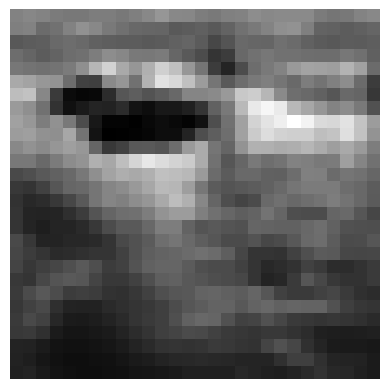

In [9]:
img,label = train_data[1]
image_np = img.squeeze()
print(image_np.shape)
# Plot the image
plt.imshow(image_np,cmap="gray")
plt.axis('off')  # Hide the axes for better visualization
plt.show()

# Fully connected network


## Check GPU

In [50]:
# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.get_device_name(0)

cuda


'NVIDIA GeForce GTX 1650'

## Function to build model and forward path of the model

In [59]:

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        Here we define the layers of the network. We create two fully connected layers

        Parameters:
            input_size: the size of the input, in this case 784 (28x28)
            num_classes: the number of classes we want to predict, in this case 2 (0-1)

        """
        super(NN, self).__init__()
        # # Our first linear layer take input_size, in this case 784 nodes to 50
        # # and our second linear layer takes 50 to the num_classes we have, in
        # # this case 10.
        # self.fc1 = nn.Linear(input_size, 50)
        # self.fc2 = nn.Linear(50, num_classes)

        self.flatten = nn.Flatten() #flattens the input tensors
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )

    def forward(self, x):
        """
        x here is the mnist images and we run it through the network that we created above.
        Parameters:
            x: mnist images
        Returns:
            out: the output of the network
        """
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [60]:
# Hyperparameters
input_size = 28*28
num_classes = 2
learning_rate = 0.001
batch_size = 64
num_epochs = 15

model = NN(input_size=input_size, num_classes=num_classes).to(device)
print(model)

clear_folder(folder)
# Visualize model in TensorBoard
example_img, labels = next(iter(train_loader))
#example_img=example_img[0]
writer.add_graph(model,example_img.to(device))
print("Model sent to tensorboard")
writer.close()


NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
)
Deleted: runs/DisplayImage\events.out.tfevents.1733367406.DESKTOP-3FC1MTH.2956.6
All contents of the folder 'runs/DisplayImage' have been cleared.
Model sent to tensorboard


## Setting up the hyperparameters

In [61]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (input_data, class_cat) in enumerate(tqdm(dataloader)):
        input_data, class_cat = input_data.to(device), class_cat.to(device)

        # Compute prediction error
        pred = model(input_data)
        class_cat=class_cat.squeeze().long()
        loss = loss_fn(pred, class_cat)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  

        loss, current = loss.item(), (batch + 1) * len(input_data)
       # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y=y.squeeze().long()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [19]:
data,label=next(iter(train_loader))
#print(label)
label=label.squeeze()
print(f"class_cat shape: {label.shape}")
print(f"class_cat values: {label}")

class_cat shape: torch.Size([20])
class_cat values: tensor([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       dtype=torch.int32)


In [62]:
for t in range(num_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 167.22it/s]

Test Error: 
 Accuracy: 73.1%, Avg loss: 0.665298 



Epoch 2
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 185.01it/s]

Test Error: 
 Accuracy: 73.1%, Avg loss: 0.646749 



Epoch 3
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 176.21it/s]

Test Error: 
 Accuracy: 73.1%, Avg loss: 0.633210 



Epoch 4
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 183.18it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.621818 

Epoch 5
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 184.25it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.611956 

Epoch 6
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 194.08it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.604317 

Epoch 7
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 227.56it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.599895 

Epoch 8
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 220.29it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.593488 

Epoch 9
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 247.18it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.587240 

Epoch 10
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 221.63it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.585974 

Epoch 11
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 202.14it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.579735 

Epoch 12
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 206.98it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.578931 

Epoch 13
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 204.55it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.582764 

Epoch 14
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 218.68it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.572864 

Epoch 15
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 244.50it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.579381 

Done!


# Example from YT of creating new neural network and training it

In [14]:
"""
A simple walkthrough of how to code a fully connected neural network
using the PyTorch library. For demonstration we train it on the very
common MNIST dataset of handwritten digits. In this code we go through
how to create the network as well as initialize a loss function, optimizer,
check accuracy and more.

Programmed by Aladdin Persson
* 2020-04-08: Initial coding
* 2021-03-24: Added more detailed comments also removed part of
              check_accuracy which would only work specifically on MNIST.
* 2022-09-23: Updated with more detailed comments, docstrings to functions, and checked code still functions as intended.
"""

# Imports
import time
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!

# Here we create our simple neural network. For more details here we are subclassing and
# inheriting from nn.Module, this is the most general way to create your networks and
# allows for more flexibility. I encourage you to also check out nn.Sequential which
# would be easier to use in this scenario but I wanted to show you something that
# "always" works and is a general approach.
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        Here we define the layers of the network. We create two fully connected layers

        Parameters:
            input_size: the size of the input, in this case 784 (28x28)
            num_classes: the number of classes we want to predict, in this case 10 (0-9)

        """
        super(NN, self).__init__()
        # Our first linear layer take input_size, in this case 784 nodes to 50
        # and our second linear layer takes 50 to the num_classes we have, in
        # this case 10.
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        """
        x here is the mnist images and we run it through fc1, fc2 that we created above.
        we also add a ReLU activation function in between and for that (since it has no parameters)
        I recommend using nn.functional (F)

        Parameters:
            x: mnist images

        Returns:
            out: the output of the network
        """

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 3

# Load Data
train_dataset = datasets.MNIST(
    root="dataset/", train=True, transform=transforms.ToTensor(), download=True
)
test_dataset = datasets.MNIST(
    root="dataset/", train=False, transform=transforms.ToTensor(), download=True
)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Initialize network
model = NN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
start=time.time()
# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        print("before")
        print(data.shape)
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        print("after")
        print(data.shape)
        # Forward
        scores = model(data)
        loss = criterion(scores, targets)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Gradient descent or adam step
        optimizer.step()
end=time.time()

# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    """
    Check accuracy of our trained model given a loader and a model

    Parameters:
        loader: torch.utils.data.DataLoader
            A loader for the dataset you want to check accuracy on
        model: nn.Module
            The model you want to check accuracy on

    Returns:
        acc: float
            The accuracy of the model on the dataset given by the loader
    """

    num_correct = 0
    num_samples = 0
    model.eval()

    # We don't need to keep track of gradients here so we wrap it in torch.no_grad()
    with torch.no_grad():
        # Loop through the data
        for x, y in loader:

            # Move data to device
            x = x.to(device=device)
            y = y.to(device=device)

            # Get to correct shape
            x = x.reshape(x.shape[0], -1)

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)

            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")
duration=end-start
print(f"time={duration}")

  0%|          | 0/938 [00:00<?, ?it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  1%|          | 8/938 [00:26<36:57,  2.38s/it]  

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  3%|▎         | 24/938 [00:26<08:03,  1.89it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

  4%|▍         | 40/938 [00:26<03:11,  4.69it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  6%|▌         | 54/938 [00:26<01:36,  9.15it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  7%|▋         | 68/938 [00:27<00:52, 16.57it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  9%|▉         | 84/938 [00:27<00:29, 28.83it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 11%|█         | 100/938 [00:27<00:19, 42.15it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 12%|█▏        | 116/938 [00:27<00:15, 53.71it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 14%|█▍        | 132/938 [00:27<00:12, 62.01it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 16%|█▌        | 148/938 [00:28<00:12, 64.90it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 17%|█▋        | 156/938 [00:28<00:11, 67.62it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 18%|█▊        | 172/938 [00:28<00:11, 69.19it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 20%|██        | 188/938 [00:28<00:10, 70.63it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 22%|██▏       | 204/938 [00:28<00:10, 71.39it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 23%|██▎       | 220/938 [00:29<00:10, 71.51it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 25%|██▌       | 236/938 [00:29<00:09, 71.98it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 27%|██▋       | 252/938 [00:29<00:09, 70.81it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 29%|██▊       | 268/938 [00:29<00:09, 70.16it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 29%|██▉       | 276/938 [00:29<00:09, 69.99it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 31%|███       | 292/938 [00:30<00:09, 70.48it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 33%|███▎      | 308/938 [00:30<00:08, 70.75it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 35%|███▍      | 324/938 [00:30<00:08, 71.28it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 36%|███▌      | 340/938 [00:30<00:08, 71.80it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 38%|███▊      | 356/938 [00:31<00:08, 71.15it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 40%|███▉      | 372/938 [00:31<00:07, 72.23it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 41%|████▏     | 388/938 [00:31<00:07, 70.98it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 43%|████▎     | 404/938 [00:31<00:07, 72.01it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 44%|████▍     | 412/938 [00:31<00:07, 71.40it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 46%|████▌     | 428/938 [00:32<00:07, 70.76it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 47%|████▋     | 444/938 [00:32<00:06, 71.13it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 49%|████▉     | 460/938 [00:32<00:06, 70.45it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 51%|█████     | 476/938 [00:32<00:06, 72.07it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 52%|█████▏    | 492/938 [00:33<00:06, 70.80it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 54%|█████▍    | 508/938 [00:33<00:06, 70.79it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 56%|█████▌    | 524/938 [00:33<00:05, 71.17it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 58%|█████▊    | 540/938 [00:33<00:05, 70.78it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 58%|█████▊    | 548/938 [00:33<00:05, 71.35it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 60%|██████    | 563/938 [00:34<00:05, 68.92it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 62%|██████▏   | 579/938 [00:34<00:05, 71.23it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 63%|██████▎   | 595/938 [00:34<00:04, 71.67it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 65%|██████▌   | 611/938 [00:34<00:04, 69.14it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 67%|██████▋   | 627/938 [00:34<00:04, 72.38it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 69%|██████▊   | 643/938 [00:35<00:03, 75.25it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 70%|███████   | 660/938 [00:35<00:03, 77.73it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 72%|███████▏  | 678/938 [00:35<00:03, 81.41it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 74%|███████▍  | 696/938 [00:35<00:02, 81.03it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 76%|███████▌  | 714/938 [00:36<00:02, 80.17it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 78%|███████▊  | 732/938 [00:36<00:02, 80.52it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 79%|███████▉  | 741/938 [00:36<00:02, 79.54it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 81%|████████  | 757/938 [00:36<00:02, 77.51it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 83%|████████▎ | 775/938 [00:36<00:02, 80.43it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 85%|████████▍ | 793/938 [00:36<00:01, 80.07it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 86%|████████▋ | 811/938 [00:37<00:01, 80.82it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 88%|████████▊ | 829/938 [00:37<00:01, 80.88it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 90%|█████████ | 847/938 [00:37<00:01, 81.97it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 92%|█████████▏| 865/938 [00:37<00:00, 82.66it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 94%|█████████▍| 883/938 [00:38<00:00, 81.46it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 95%|█████████▌| 892/938 [00:38<00:00, 81.28it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 97%|█████████▋| 910/938 [00:38<00:00, 80.44it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 99%|█████████▉| 929/938 [00:38<00:00, 81.68it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

100%|██████████| 938/938 [00:38<00:00, 24.20it/s]


before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([32, 1, 28, 28])
after
torch.Size([32, 784])


  1%|          | 6/938 [00:00<00:16, 58.16it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  1%|▏         | 14/938 [00:00<00:13, 69.54it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  2%|▏         | 22/938 [00:00<00:12, 73.87it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  4%|▍         | 38/938 [00:00<00:12, 74.73it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  6%|▌         | 56/938 [00:00<00:11, 79.51it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

  8%|▊         | 73/938 [00:00<00:10, 79.59it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 10%|▉         | 90/938 [00:01<00:10, 78.64it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 12%|█▏        | 108/938 [00:01<00:10, 81.06it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 13%|█▎        | 126/938 [00:01<00:10, 80.64it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 15%|█▌        | 144/938 [00:01<00:09, 82.83it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 16%|█▋        | 153/938 [00:01<00:09, 80.80it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 18%|█▊        | 171/938 [00:02<00:09, 82.61it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 20%|██        | 189/938 [00:02<00:09, 80.01it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 22%|██▏       | 207/938 [00:02<00:08, 81.43it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 24%|██▍       | 225/938 [00:02<00:08, 79.89it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 26%|██▌       | 241/938 [00:03<00:08, 79.15it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 28%|██▊       | 259/938 [00:03<00:08, 80.36it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 30%|██▉       | 277/938 [00:03<00:08, 79.06it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 31%|███       | 293/938 [00:03<00:08, 78.99it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 33%|███▎      | 310/938 [00:03<00:07, 79.77it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 34%|███▍      | 318/938 [00:04<00:07, 79.46it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 36%|███▌      | 335/938 [00:04<00:07, 79.01it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 38%|███▊      | 352/938 [00:04<00:07, 79.26it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 39%|███▉      | 370/938 [00:04<00:07, 80.76it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 41%|████▏     | 388/938 [00:04<00:06, 80.24it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 43%|████▎     | 406/938 [00:05<00:06, 81.15it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 45%|████▌     | 424/938 [00:05<00:06, 80.63it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 47%|████▋     | 442/938 [00:05<00:06, 80.33it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 49%|████▉     | 460/938 [00:05<00:06, 79.47it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 51%|█████     | 478/938 [00:05<00:05, 81.39it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 52%|█████▏    | 487/938 [00:06<00:05, 82.33it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 54%|█████▍    | 505/938 [00:06<00:05, 80.06it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 56%|█████▌    | 523/938 [00:06<00:05, 81.21it/s]

after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 2

 58%|█████▊    | 540/938 [00:06<00:05, 79.56it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 59%|█████▉    | 557/938 [00:06<00:04, 80.62it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 61%|██████▏   | 575/938 [00:07<00:04, 79.33it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 63%|██████▎   | 593/938 [00:07<00:04, 79.35it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 65%|██████▌   | 610/938 [00:07<00:04, 79.46it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 67%|██████▋   | 628/938 [00:07<00:03, 80.80it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 69%|██████▉   | 646/938 [00:08<00:03, 78.41it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 70%|██████▉   | 655/938 [00:08<00:03, 79.32it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 72%|███████▏  | 673/938 [00:08<00:03, 79.53it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 74%|███████▎  | 691/938 [00:08<00:03, 80.49it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 76%|███████▌  | 709/938 [00:08<00:02, 79.91it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 77%|███████▋  | 725/938 [00:09<00:02, 77.70it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 79%|███████▉  | 743/938 [00:09<00:02, 79.63it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 81%|████████  | 760/938 [00:09<00:02, 80.09it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 83%|████████▎ | 778/938 [00:09<00:02, 79.41it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 85%|████████▍ | 795/938 [00:09<00:01, 80.47it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 86%|████████▌ | 804/938 [00:10<00:01, 79.89it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 88%|████████▊ | 822/938 [00:10<00:01, 77.87it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 89%|████████▉ | 839/938 [00:10<00:01, 79.51it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 91%|█████████▏| 856/938 [00:10<00:01, 80.07it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 93%|█████████▎| 874/938 [00:10<00:00, 80.15it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 95%|█████████▌| 892/938 [00:11<00:00, 81.18it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 97%|█████████▋| 910/938 [00:11<00:00, 79.92it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 99%|█████████▉| 928/938 [00:11<00:00, 80.89it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

100%|██████████| 938/938 [00:11<00:00, 79.88it/s]


before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([32, 1, 28, 28])
after
torch.Size([32, 784])


  1%|          | 7/938 [00:00<00:13, 67.48it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  2%|▏         | 15/938 [00:00<00:12, 71.87it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  3%|▎         | 24/938 [00:00<00:12, 74.40it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  3%|▎         | 32/938 [00:00<00:11, 75.66it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  4%|▍         | 40/938 [00:00<00:11, 76.48it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  5%|▌         | 48/938 [00:00<00:11, 76.42it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  6%|▌         | 56/938 [00:00<00:11, 76.39it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  7%|▋         | 64/938 [00:00<00:11, 75.83it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  8%|▊         | 73/938 [00:00<00:11, 75.88it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  9%|▊         | 81/938 [00:01<00:11, 76.57it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


  9%|▉         | 89/938 [00:01<00:11, 76.81it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 10%|█         | 97/938 [00:01<00:10, 76.94it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])


 11%|█         | 105/938 [00:01<00:10, 76.34it/s]

after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 13%|█▎        | 121/938 [00:01<00:10, 77.62it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 15%|█▍        | 138/938 [00:01<00:10, 77.92it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 16%|█▌        | 147/938 [00:01<00:09, 79.52it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 17%|█▋        | 155/938 [00:02<00:09, 78.95it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 17%|█▋        | 164/938 [00:02<00:09, 79.45it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 18%|█▊        | 172/938 [00:02<00:09, 79.21it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 20%|██        | 188/938 [00:02<00:09, 78.24it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 21%|██        | 196/938 [00:02<00:09, 78.37it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 22%|██▏       | 205/938 [00:02<00:09, 79.25it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 23%|██▎       | 213/938 [00:02<00:09, 74.90it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 24%|██▎       | 222/938 [00:02<00:09, 76.32it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 25%|██▍       | 230/938 [00:02<00:09, 76.21it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 25%|██▌       | 238/938 [00:03<00:09, 75.50it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 26%|██▌       | 246/938 [00:03<00:09, 75.54it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 27%|██▋       | 254/938 [00:03<00:08, 76.04it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 28%|██▊       | 262/938 [00:03<00:08, 76.13it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 29%|██▉       | 270/938 [00:03<00:08, 75.39it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 30%|██▉       | 279/938 [00:03<00:08, 75.72it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 31%|███       | 287/938 [00:03<00:08, 75.65it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 32%|███▏      | 296/938 [00:03<00:08, 77.82it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 34%|███▍      | 322/938 [00:04<00:07, 81.03it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 35%|███▌      | 331/938 [00:04<00:07, 79.67it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 37%|███▋      | 348/938 [00:04<00:07, 79.28it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 39%|███▉      | 366/938 [00:04<00:07, 79.41it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 41%|████      | 384/938 [00:04<00:07, 75.74it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 43%|████▎     | 401/938 [00:05<00:06, 78.33it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 44%|████▍     | 417/938 [00:05<00:06, 77.47it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 46%|████▌     | 433/938 [00:05<00:06, 75.44it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 48%|████▊     | 449/938 [00:05<00:06, 77.20it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 50%|████▉     | 465/938 [00:06<00:06, 72.66it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 51%|█████▏    | 482/938 [00:06<00:05, 77.44it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 52%|█████▏    | 490/938 [00:06<00:05, 75.04it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 54%|█████▍    | 508/938 [00:06<00:05, 79.08it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 56%|█████▌    | 524/938 [00:06<00:05, 77.51it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 58%|█████▊    | 540/938 [00:06<00:05, 77.44it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 59%|█████▉    | 556/938 [00:07<00:05, 75.81it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 61%|██████    | 573/938 [00:07<00:04, 78.53it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 63%|██████▎   | 590/938 [00:07<00:04, 78.62it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 65%|██████▍   | 607/938 [00:07<00:04, 77.81it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 66%|██████▋   | 623/938 [00:08<00:04, 75.29it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 68%|██████▊   | 639/938 [00:08<00:03, 75.83it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 70%|██████▉   | 656/938 [00:08<00:03, 78.15it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 72%|███████▏  | 673/938 [00:08<00:03, 79.72it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 74%|███████▎  | 691/938 [00:08<00:03, 82.00it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 76%|███████▌  | 709/938 [00:09<00:02, 79.47it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 78%|███████▊  | 727/938 [00:09<00:02, 81.92it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 79%|███████▉  | 745/938 [00:09<00:02, 78.86it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 81%|████████  | 762/938 [00:09<00:02, 80.19it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 82%|████████▏ | 771/938 [00:09<00:02, 79.57it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 84%|████████▍ | 789/938 [00:10<00:01, 81.96it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 86%|████████▌ | 807/938 [00:10<00:01, 80.58it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 88%|████████▊ | 825/938 [00:10<00:01, 79.34it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 90%|████████▉ | 843/938 [00:10<00:01, 79.95it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 92%|█████████▏| 861/938 [00:11<00:00, 78.68it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 94%|█████████▎| 878/938 [00:11<00:00, 79.18it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 94%|█████████▍| 886/938 [00:11<00:00, 78.54it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])


 96%|█████████▌| 902/938 [00:11<00:00, 78.15it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

 98%|█████████▊| 919/938 [00:11<00:00, 79.20it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64

100%|██████████| 938/938 [00:12<00:00, 77.87it/s]

before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([64, 1, 28, 28])
after
torch.Size([64, 784])
before
torch.Size([32, 1, 28, 28])
after
torch.Size([32, 784])


Accuracy on training set: 96.04
Accuracy on test set: 95.62
time=62.56461501121521
